In [ ]:
import mariadb
import sys

config = {
    'host': '127.0.0.1',
    'port': 3306,
    'user': 'root',
    'password': 'root',
    'database': 'employees'
}


In [ ]:
# connection for MariaDB
try:
    conn = mariadb.connect(**config)

except mariadb.Error as e:
    print(f"Error para conectarse con Maria DB: {e}")
    sys.exit(1)

# Enable Auto-Commit
conn.autocommit = True

# create a connection cursor
cur = conn.cursor()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

query = """
SELECT titles.title, salaries.salary, salaries.from_date
FROM titles
INNER JOIN salaries ON titles.emp_no=salaries.emp_no
WHERE titles.title="Senior Engineer"
limit 10000;"""

df=pd.read_sql(query,conn)
df

c:\Users\52333\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,title,salary,from_date
0,Senior Engineer,60117,1986-06-26
1,Senior Engineer,62102,1987-06-26
2,Senior Engineer,66074,1988-06-25
3,Senior Engineer,66596,1989-06-25
4,Senior Engineer,66961,1990-06-25
...,...,...,...
9995,Senior Engineer,92424,1990-08-22
9996,Senior Engineer,54083,1986-06-14
9997,Senior Engineer,54484,1987-06-14
9998,Senior Engineer,58120,1988-06-13


In [ ]:
import datetime as dt

df['from_date'] = df['from_date'].astype('datetime64[ns]')
df['from_date'] = df['from_date'].apply(dt.datetime.toordinal)
df


,title,salary,from_date
0,Senior Engineer,60117,725183
1,Senior Engineer,62102,725548
2,Senior Engineer,66074,725913
3,Senior Engineer,66596,726278
4,Senior Engineer,66961,726643
...,...,...,...
9995,Senior Engineer,92424,726701
9996,Senior Engineer,54083,725171
9997,Senior Engineer,54484,725536
9998,Senior Engineer,58120,725901


In [ ]:
x=df['from_date'].values
y=df['salary'].values
x[0:10]

array([725183, 725548, 725913, 726278, 726643, 727008, 727373, 727738,
       728103, 728468], dtype=int64)

In [ ]:

import numpy as np
import jax
import jax.numpy as jnp

def modelo(m,b,x,y):
    return m*x+b

def loss(m,b,x,y):
    prediccion=modelo(m,b,x,y)
    return jnp.mean((prediccion-y)**2)

def update(m,b,x,y,lr):
    m=m-lr*jax.grad(loss,argnums=0)(m,b, x, y)
    b=b-lr*jax.grad(loss,argnums=1)(m,b, x, y)
    return m,b

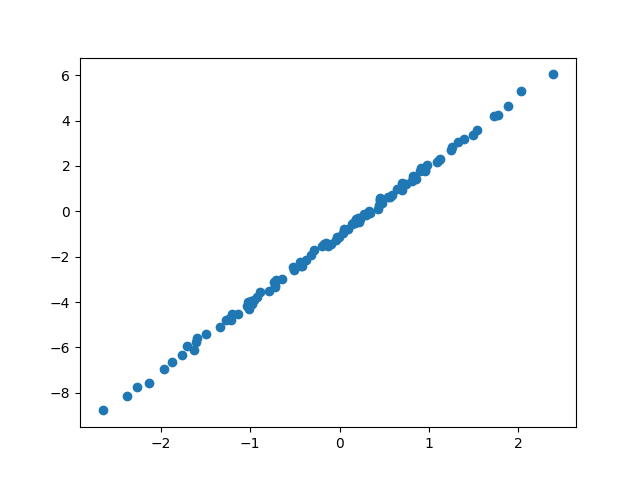

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


fig = plt.figure()
xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.1, size=(100,))
ys = xs * 3 - 1 + noise
plt.scatter(xs, ys)
plt.show()


In [ ]:
ax = plt.axes(xlim=(-2, 3), ylim=(-8, 8))
plt.scatter(xs, ys)
line, = ax.plot([], [], lw=2, color = 'red')

def init():
    line.set_data([], [])
    return line,

m=1.0
b=1.0

def animate(i):
    m = update(m,b, xs, ys)[0]
    m = update(m,b, xs, ys)[1]
    line.set_data(xs, model(m,b, xs))
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=60, interval=200, repeat=False)


c:\Users\52333\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
